In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Week 3: Lecture 6 Census

## Table Review: Welcome Survey

Complete this [Class Data Survey](https://forms.gle/Bsg4WBLt8oiVyZrNA). Individuals will not be identified. You may leave any answers blank. We'll use this Class Data to use the rest of the quarter. Thank you in advance!

## Discussion Question: NBA Salaries

In [12]:
nba = Table.read_table('data/nba_salaries.csv')
nba = nba.relabeled(3, 'SALARY').drop('TEAM')
nba.show(3)

PLAYER,POSITION,SALARY
Paul Millsap,PF,18.6717
Al Horford,C,12
Tiago Splitter,C,9.75625


In [8]:
# Question (a)
guards = nba.where('POSITION', 'PG') # 1) grab all the pointguards, under the Position column, 
# they have PF code
#guards
# 2) give us those who make more than $15 million/year
guards.where('SALARY', are.above(15)).column('PLAYER')
#3) extracted the names of those five players in an array form

array(['Derrick Rose', 'Kyrie Irving', 'Chris Paul', 'Russell Westbrook',
       'John Wall'], dtype='<U24')

In [6]:
help(Table.column)

Help on function column in module datascience.tables:

column(self, index_or_label)
    Return the values of a column as an array.
    
    table.column(label) is equivalent to table[label].
    
    >>> tiles = Table().with_columns(
    ...     'letter', make_array('c', 'd'),
    ...     'count',  make_array(2, 4),
    ... )
    
    >>> list(tiles.column('letter'))
    ['c', 'd']
    >>> tiles.column(1)
    array([2, 4])
    
    Args:
        label (int or str): The index or label of a column
    
    Returns:
        An instance of ``numpy.array``.
    
    Raises:
        ``ValueError``: When the ``index_or_label`` is not in the table.



In [13]:
# Question (b)
nba_player_salary = nba.drop('POSITION') # we do drop the POSITION column
# but this change is not saved, we didn't save this change to the original nba table
nba_player_salary.num_columns # still referencing original nba table, with all three columns

2

In [14]:
nba_player_salary

PLAYER,SALARY
Paul Millsap,18.6717
Al Horford,12
Tiago Splitter,9.75625
Jeff Teague,8
Kyle Korver,5.74648
Thabo Sefolosha,4
Mike Scott,3.33333
Kent Bazemore,2
Dennis Schroder,1.7634
Tim Hardaway Jr.,1.30452


In [15]:
nba

PLAYER,POSITION,SALARY
Paul Millsap,PF,18.6717
Al Horford,C,12
Tiago Splitter,C,9.75625
Jeff Teague,PG,8
Kyle Korver,SG,5.74648
Thabo Sefolosha,SF,4
Mike Scott,PF,3.33333
Kent Bazemore,SF,2
Dennis Schroder,PG,1.7634
Tim Hardaway Jr.,SG,1.30452


## Census: Population Trends ##

In [16]:
# As of August 2021, this census file is online here: 
data = 'http://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/nc-est2019-agesex-res.csv'

# A description of the table appears online.
# https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/nc-est2019-agesex-res.pdf

full_census_table = Table.read_table(data)
full_census_table

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,0,3944153,3944160,3951430,3963092,3926570,3931258,3954787,3983981,3954773,3893990,3815343,3783052
0,1,3978070,3978090,3957730,3966225,3977549,3942698,3948891,3973133,4002903,3972711,3908830,3829599
0,2,4096929,4096939,4090621,3970654,3978925,3991740,3958711,3966321,3991349,4020045,3987032,3922044
0,3,4119040,4119051,4111688,4101644,3981531,3991017,4005928,3974351,3982984,4006946,4033038,3998665
0,4,4063170,4063186,4077346,4121488,4111490,3992502,4004032,4020292,3989750,3997280,4018719,4043323
0,5,4056858,4056872,4064521,4087054,4131049,4121876,4004576,4017589,4035033,4003452,4008443,4028281
0,6,4066381,4066412,4072904,4074531,4096631,4141126,4133372,4017388,4031568,4048018,4014057,4017227
0,7,4030579,4030594,4042990,4082821,4084175,4106756,4152666,4145872,4030888,4044139,4058370,4022319
0,8,4046486,4046497,4025501,4052773,4092559,4094513,4118349,4165033,4158848,4042924,4054236,4066194
0,9,4148353,4148369,4125312,4035319,4062726,4103052,4106068,4130887,4177895,4170813,4053179,4061874


[A description of the table appears online.](https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/nc-est2019-agesex-res.pdf)

The Census dataset contain estimates of the US population in each category of sex and age in the years 2010 through 2019. The Census is decennial: it takes place every 10 years. The most recent Census was held in 2020 and the one before that in 2010. The Census Bureau also estimates population changes each year. As explained in the Bureau’s description of its methodology, it “adds [the estimated changes] to the last decennial census to produce updated population estimates every year.”



In [17]:
partial_census_table = full_census_table.select('SEX', 'AGE', 'POPESTIMATE2014', 'POPESTIMATE2019')
partial_census_table.sort("SEX",descending=True)

SEX,AGE,POPESTIMATE2014,POPESTIMATE2019
2,0,1930276,1847935
2,1,1930380,1871014
2,2,1934959,1916500
2,3,1956678,1955655
2,4,1960508,1976372
2,5,1961786,1967081
2,6,2024017,1964271
2,7,2031240,1966584
2,8,2014018,1986471
2,9,2009689,1988726


In [18]:
us_pop = partial_census_table.relabeled('POPESTIMATE2014', '2014').relabeled('POPESTIMATE2019', '2019')
us_pop

SEX,AGE,2014,2019
0,0,3954787,3783052
0,1,3948891,3829599
0,2,3958711,3922044
0,3,4005928,3998665
0,4,4004032,4043323
0,5,4004576,4028281
0,6,4133372,4017227
0,7,4152666,4022319
0,8,4118349,4066194
0,9,4106068,4061874


In [20]:
us_pop_by_age = us_pop.where('SEX', are.equal_to(0)).drop('SEX')
us_pop_by_age

AGE,2014,2019
0,3954787,3783052
1,3948891,3829599
2,3958711,3922044
3,4005928,3998665
4,4004032,4043323
5,4004576,4028281
6,4133372,4017227
7,4152666,4022319
8,4118349,4066194
9,4106068,4061874


In [25]:
us_pop_by_age.where('AGE', are.between(97, 101))

AGE,2014,2019
97,82948,116969
98,59546,86150
99,41277,57124
100,70685,100322


In [26]:
change = us_pop_by_age.column('2019') - us_pop_by_age.column('2014')
change

array([-171735, -119292,  -36667,   -7263,   39291,   23705, -116145,
       -130347,  -52155,  -44194,  -53618,  104804,  141200,    7126,
        -66894,   12631,  -15505,  -39515,   34483,    9650, -141227,
       -201943, -305343, -350651, -241835,   37812,  214055,  409073,
        473478,  423954,  367437,  187860,  107298,  164752,  106148,
        231701,  368026,  396847,  456720,  413012,  259488,  114457,
       -109083, -465225, -408175, -309623, -172883,  -10547,  136860,
        -67294, -382619, -471938, -465942, -454394, -257650,  -35878,
        -23436,    6477,  204719,  267974,  276258,  389471,  479237,
        431491,  468789,  397927,  277420,  -15667,  777964,  721963,
        675278,  566691,  999406,  334331,  395023,  425854,  529432,
        355290,  240082,  185899,  211738,  166007,   88415,   62136,
         33339,      69,    3971,   11314,   30645,   39031,   26166,
         42338,   41539,   36143,   47264,   51094,   37036,   34021,
         26604,   15

In [27]:
us_pop_change = us_pop_by_age.with_columns(
    'Change', change,
    'Percent Change', change/us_pop_by_age.column('2014')
)
us_pop_change.set_format('Percent Change', PercentFormatter)

AGE,2014,2019,Change,Percent Change
0,3954787,3783052,-171735,-4.34%
1,3948891,3829599,-119292,-3.02%
2,3958711,3922044,-36667,-0.93%
3,4005928,3998665,-7263,-0.18%
4,4004032,4043323,39291,0.98%
5,4004576,4028281,23705,0.59%
6,4133372,4017227,-116145,-2.81%
7,4152666,4022319,-130347,-3.14%
8,4118349,4066194,-52155,-1.27%
9,4106068,4061874,-44194,-1.08%


In [28]:
us_pop_change.where('AGE', are.equal_to(999))

AGE,2014,2019,Change,Percent Change
999,318301008,328239523,9938515,3.12%


In [29]:
us_pop_change.where(
    'AGE', are.below(999)
).sort('Change', descending=True)

AGE,2014,2019,Change,Percent Change
72,2191642,3191048,999406,45.60%
68,2567511,3345475,777964,30.30%
69,2530460,3252423,721963,28.53%
70,2461426,3136704,675278,27.43%
71,2516392,3083083,566691,22.52%
76,1692960,2222392,529432,31.27%
62,3677408,4156645,479237,13.03%
28,4345247,4818725,473478,10.90%
64,3481789,3950578,468789,13.46%
38,3848856,4305576,456720,11.87%


The Census form asks respondents to provide the sex of each household member by checking one of two boxes labeled Male and Female. The SEX column contains numeric codes: 1 for male, 2 for female, and 0 for the total.



Take a look at the top few rows. While the percent change is about 3% for the overall population, it jumps to well over 20% for the people in their late sixties and early seventies. This stunning change contributes to what is known as the greying of America.

What could explain this large increase? 

We can explore this question by examining the years in which the relevant groups were born.

Those who were in the age group 69 to 72 in 2014 were born in the years 1942 to 1945. The attack on Pearl Harbor was in late 1941, and by 1942 U.S. forces were heavily engaged in a massive war that ended in 1945.

Those who were 69 to 72 years old in 2019 were born in the years 1947 to 1950, at the height of the post-WWII baby boom in the United States.

The post-war jump in births is a major reason for the large changes that we have observed.

## Sex Ratios

The Census form asks respondents to provide the sex of each household member by checking one of two boxes labeled Male and Female. The SEX column contains numeric codes: 1 for male, 2 for female, and 0 for the total.



In [34]:
us_pop_2019 = us_pop.drop('2014')
all_ages = us_pop_2019.where('AGE', are.equal_to(999))
all_ages
us_pop_2019

SEX,AGE,2019
0,0,3783052
0,1,3829599
0,2,3922044
0,3,3998665
0,4,4043323
0,5,4028281
0,6,4017227
0,7,4022319
0,8,4066194
0,9,4061874


In [31]:
pop_2019 = all_ages.column('2019').item(0)
all_ages.with_column(
    'Proportion', all_ages.column('2019')/pop_2019
).set_format('Proportion', PercentFormatter)

SEX,AGE,2019,Proportion
0,999,328239523,100.00%
1,999,161657324,49.25%
2,999,166582199,50.75%


In [33]:
help(Table.where)

Help on function where in module datascience.tables:

where(self, column_or_label, value_or_predicate=None, other=None)
    Return a new ``Table`` containing rows where ``value_or_predicate``
    returns True for values in ``column_or_label``.
    
    Args:
        ``column_or_label``: A column of the ``Table`` either as a label
        (``str``) or an index (``int``). Can also be an array of booleans;
        only the rows where the array value is ``True`` are kept.
    
        ``value_or_predicate``: If a function, it is applied to every value
        in ``column_or_label``. Only the rows where ``value_or_predicate``
        returns True are kept. If a single value, only the rows where the
        values in ``column_or_label`` are equal to ``value_or_predicate``
        are kept.
    
        ``other``: Optional additional column label for
        ``value_or_predicate`` to make pairwise comparisons. See the
        examples below for usage. When ``other`` is supplied,
        ``val

In [32]:
infants = us_pop_2019.where('AGE', are.equal_to(0))
infants

SEX,AGE,2019
0,0,3783052
1,0,1935117
2,0,1847935


In [35]:
us_pop_2019.select('AGE')

AGE
0
1
2
3
4
5
6
7
8
9


In [36]:
infants_2019 = infants.column('2019').item(0)
infants.with_column(
    'Proportion', infants.column('2019')/infants_2019
).set_format('Proportion', PercentFormatter)

SEX,AGE,2019,Proportion
0,0,3783052,100.00%
1,0,1935117,51.15%
2,0,1847935,48.85%


In [37]:
females_all_rows = us_pop_2019.where('SEX', are.equal_to(2))
females = females_all_rows.where('AGE', are.not_equal_to(999))
females

SEX,AGE,2019
2,0,1847935
2,1,1871014
2,2,1916500
2,3,1955655
2,4,1976372
2,5,1967081
2,6,1964271
2,7,1966584
2,8,1986471
2,9,1988726


In [38]:
males_all_rows = us_pop_2019.where('SEX', are.equal_to(1))
males = males_all_rows.where('AGE', are.not_equal_to(999))
males

SEX,AGE,2019
1,0,1935117
1,1,1958585
1,2,2005544
1,3,2043010
1,4,2066951
1,5,2061200
1,6,2052956
1,7,2055735
1,8,2079723
1,9,2073148


In [39]:
males.column('AGE')

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [40]:
females.column('AGE')

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [41]:
ratios = Table().with_columns(
    'AGE', females.column('AGE'),
    '2019 F:M RATIO', females.column('2019')/males.column('2019')
)
ratios

AGE,2019 F:M RATIO
0,0.954947
1,0.955289
2,0.955601
3,0.957242
4,0.956177
5,0.954338
6,0.956801
7,0.956633
8,0.955161
9,0.959278


In [42]:
ratios.where('AGE', are.above(75)).show()

AGE,2019 F:M RATIO
76,1.21422
77,1.23558
78,1.26373
79,1.28129
80,1.29209
81,1.32745
82,1.36101
83,1.39749
84,1.44603
85,1.48588


In [43]:
males.where('AGE', are.contained_in(make_array(92, 93, 99)))

SEX,AGE,2019
1,92,131684
1,93,103415
1,99,14596


In [44]:
females.where('AGE', are.contained_in(make_array(92, 93, 99)))

SEX,AGE,2019
2,92,262383
2,93,217370
2,99,42528


## Visualization ##

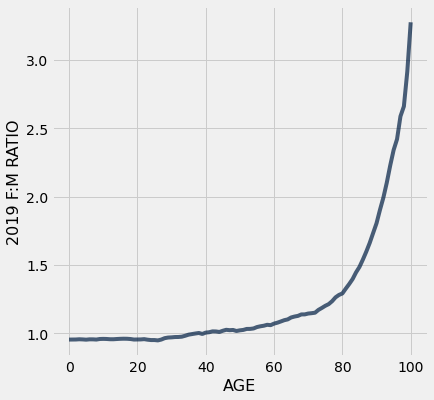

In [45]:
ratios.plot('AGE')